In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Diamonds data

1. Load the data and perform basic checks. How many diamonds do we have?

In [3]:
df_diamonds = pd.read_csv('./diamonds.csv.bz2', sep='\t')

In [4]:
print(df_diamonds.shape)
df_diamonds.sample(5)

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
28860,0.30,Ideal,F,VVS2,62.3,54.0,684,4.32,4.35,2.70
50332,0.70,Very Good,D,SI1,64.0,53.0,2242,5.57,5.61,3.58
53780,0.80,Ideal,G,VS2,62.1,56.0,2728,5.94,6.00,3.71
49178,0.64,Premium,D,SI1,62.3,58.0,2074,5.53,5.49,3.43
28696,0.40,Ideal,E,SI2,61.8,55.2,679,4.75,4.77,2.94


2. Inspect the variable cut. What kind of different cuts are there? How frequent are those?
Hint: remember the method value_counts?

In [5]:
df_diamonds['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

# 2. Regression analysis

1. Perform a linear regression analysis where you include two variables: mass of diamonds (carat) and cut. Estimate model of a form

pricei =β0 +β1carati +β2 ·cuti +εi

Show the estimation results (the table).
Note: in the notation above β2 is a vector of cut-related coefficients and cut is a vector of dummies. smf will do this automatically for you.

In [6]:
m = smf.ols("price ~ carat + cut", data=df_diamonds).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        12:42:28   Log-Likelihood:            -4.7142e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3875.4697     40.408    -95.908      0.000   -3954.670   -3796.269
cut[T.Good]       1120.3319     43.499     25.755      0.000    1035.073    1205.591
cut[T.Ideal]      1800.9240     39.344     45.773      0.000    1723.809    1878.039
cut[T.Premium]    1439.0771     39.865     36.098      0.000    1360.941    1517.214
cut[T.Very Good]  1510.1354     40.240     37.528      0.000    1431.265    1589.006
carat             7871.0821     13.980    563.040      0.000    7843.682    7898.482
==============================================================================
Omnibus:                    14616.138   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150962.278
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.944   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. What is the reference category for cut?

    Fair        

3. Interpret the following coefficients:
   (a) What is “carat” (correct value should be 7871)?

   (b) What is “cut[T:Ideal]” (correct value should be 1800)?

   (c) How much more expensive are ideal-cut diamonds compared to very good-cut diamonds (in average) given they weight the same?
   
   (d) What does your model predict–what is be the (average) price for 1ct premium cut diamond?
   Note: if you are wondering why do we have negative intercept here, then check out the Section 3 below.

a) 'carat' 

b) ideal cut 1800 higher than fair cut, the dummy variable 

c) ideal-cut diamonds are cut[T.Ideal] - cut[T.Good] = 1800.9240 - 1510.1354 =  290.7886

d) the model is y-intercept + coefficient * variables 

price = intercept + cut[T.Premium] + 1 * carat

In [7]:
price = -3875.4697 + 1439.0771 + 1 * 7871.0821
print(price)

5434.6894999999995


In [8]:
print('$', round(-3875.4697 + 1439.0771 + 1 * 7871.0821) )

$ 5435


# 3. Log transform

Is pricei =β0+β1carati+β2·cuti+εi a good model?

1. Plot the price versus mass and add the regression line to it. Can you explain, using this plot, why did we get a negative intercept in the models above?

Hint: use sns.regplot to achieve this.
Hint 2: there are ∼ 50k diamonds and the plot will be slow and crowded. Plot only a subsample of data, something like
`sns.regplot(..., data=diamonds.sample(1000))`

A negative intercept often occurs in untransformed models due to data skewness and curvature.

In [9]:
df_diamonds["log(price)"] = np.log(df_diamonds['price'])
df_diamonds["log(carat)"] = np.log(df_diamonds['carat'])

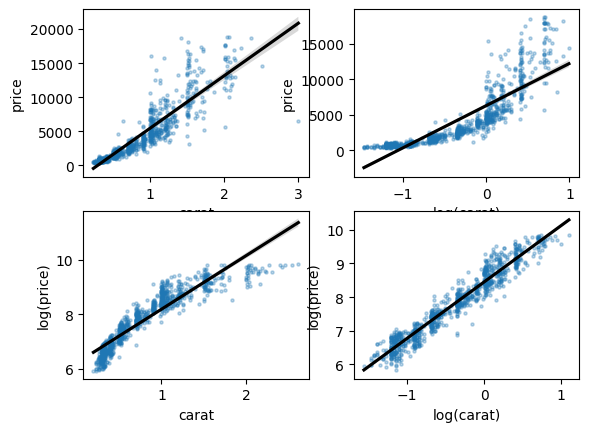

In [10]:
fig, axes = plt.subplots(2, 2)

_ = sns.regplot(ax = axes[0, 0],
                x = "carat",
                y = "price",
                data = df_diamonds.sample(1000),
                scatter_kws = {"s": 5, "alpha": 0.3},
                line_kws = {"color": "black"})
_ = sns.regplot(ax = axes[0, 1],
                x = "log(carat)",
                y = "price",
                data = df_diamonds.sample(1000),
                scatter_kws = {"s": 5, "alpha": 0.3},
                line_kws = {"color": "black"})
_ = sns.regplot(ax = axes[1, 0],
                x = "carat",
                y = "log(price)",
                data = df_diamonds.sample(1000),
                scatter_kws = {"s": 5, "alpha": 0.3},
                line_kws = {"color": "black"})
_ = sns.regplot(ax = axes[1, 1],
                x = "log(carat)",
                y = "log(price)",
                data = df_diamonds.sample(1000),
                scatter_kws = {"s": 5, "alpha": 0.3},
                line_kws = {"color": "black"})

2. Experiment with log scale for a) price, b) carat, c) both. Which plot does look the best?

    log scale fits the best

3. Add the corresponding log-transform to your model. You can run log-transformed models just like
smf.ols("np.log(price)~np.log(carat)", ...).

In [11]:
m = smf.ols("np.log(price) ~ np.log(carat) + cut", data=df_diamonds).fit()

In [12]:
m = smf.ols("Q('log(price)')~ Q('log(carat)') + cut", data=df_diamonds).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('log(price)')   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.607e+05
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        12:42:29   Log-Likelihood:                -2716.7
No. Observations:               53940   AIC:                             5445.
Df Residuals:                   53934   BIC:                             5499.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.2001      0.006   1292.692      0.000       8.188       8.213
cut[T.Good]          0.1632      0.007     22.289      0.000       0.149       0.178
cut[T.Ideal]         0.3172      0.007     47.830      0.000       0.304       0.330
cut[T.Premium]       0.2382      0.007     35.470      0.000       0.225       0.251
cut[T.Very Good]     0.2408      0.007     35.517      0.000       0.227       0.254
Q('log(carat)')      1.6958      0.002    887.679      0.000       1.692       1.700
==============================================================================
Omnibus:                      845.283   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1407.337
Skew:                           0.137   Prob(JB):                    2.52e-306
Kurtosis:                       3.742   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

.937 is higher than the value from the previous and therefore is the better fitting model 

In [13]:
m = smf.ols("np.log(price) ~ np.log(carat) + cut", data=df_diamonds).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.607e+05
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        12:42:29   Log-Likelihood:                -2716.7
No. Observations:               53940   AIC:                             5445.
Df Residuals:                   53934   BIC:                             5499.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.2001      0.006   1292.692      0.000       8.188       8.213
cut[T.Good]          0.1632      0.007     22.289      0.000       0.149       0.178
cut[T.Ideal]         0.3172      0.007     47.830      0.000       0.304       0.330
cut[T.Premium]       0.2382      0.007     35.470      0.000       0.225       0.251
cut[T.Very Good]     0.2408      0.007     35.517      0.000       0.227       0.254
np.log(carat)        1.6958      0.002    887.679      0.000       1.692       1.700
==============================================================================
Omnibus:                      845.283   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1407.337
Skew:                           0.137   Prob(JB):                    2.52e-306
Kurtosis:                       3.742   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. What does R2 suggest: is log-transformed model better than non-log transformed?
If you have time, then add cut to this model and interpret the coefficients.
See Lecture Notes Section 2.1.8 Feature Transformations.

Log-transformed model is better than non-log transformed. Log transformation helps stabilize variance and reduce skewness, creating a more linear relationship between log(price) and log(carat).